In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train-Set.csv')
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,18,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,wed,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no


In [3]:
test = pd.read_csv('Test-Set.csv')
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,wed,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,8,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,fri,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,17,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,12,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,fri,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,29,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,wed,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,mon,488,2,999,0,nonexistent


In [4]:
submission=pd.read_csv('Sample_Submition.csv')

In [5]:
submission=pd.DataFrame()
submission['id']=test['id']

In [6]:
submission['id']

0        74249
1        35779
2        66769
3        27888
4        63306
         ...  
23444      902
23445    39745
23446    40150
23447     6012
23448    61584
Name: id, Length: 23449, dtype: int64

In [7]:
for index, row in train.iterrows():
    if row['day'] in train['month'].values:
        train.at[index, 'month'] = row['day']

In [8]:
for index, row in test.iterrows():
    if row['day'] in test['month'].values:
        test.at[index, 'month'] = row['day']

In [9]:
train.drop(columns=['day'],inplace=True)
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,apr,149,2,182,1,failure,no


In [10]:
test.drop(columns=['day'],inplace=True)
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,488,2,999,0,nonexistent


In [11]:
train = train.drop(['Unnamed: 0','id'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [12]:
train[["balance", "job"]].groupby(['job'], as_index=False).mean().sort_values(by='balance', ascending=False)

,job,balance
5,retired,2024.986965
11,unknown,1756.354167
4,management,1739.914239
6,self-employed,1715.210432
2,entrepreneur,1603.845057
3,housemaid,1434.241972
10,unemployed,1415.696903
8,student,1376.900000
9,technician,1288.505478
0,admin.,1124.733057


In [13]:
for i in range(len(train)):
    if (train['age'][i]<18):
        train['age'][i]=18
        
for i in range(len(test)):
    if (test['age'][i]<18):
        test['age'][i]=18

C:\Users\emana\AppData\Local\Temp\ipykernel_23392\2876134734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'][i]=18
C:\Users\emana\AppData\Local\Temp\ipykernel_23392\2876134734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'][i]=18


In [14]:


for i in range(len(train)):
    if (train['age'][i]>70):
        train['age'][i]=70
        
for i in range(len(test)):
    if (test['age'][i]>70):
        test['age'][i]=70



C:\Users\emana\AppData\Local\Temp\ipykernel_23392\3440480567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'][i]=70
C:\Users\emana\AppData\Local\Temp\ipykernel_23392\3440480567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'][i]=70


C:\Users\emana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

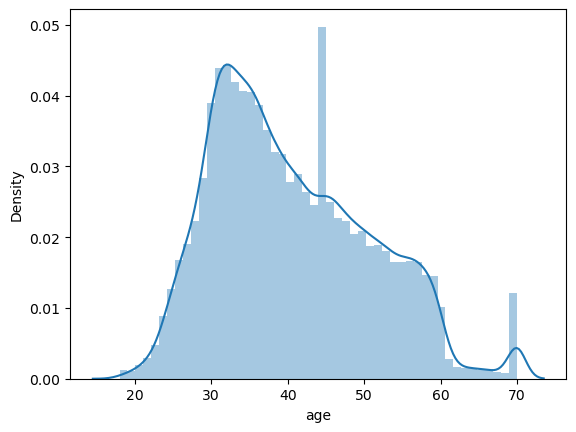

In [15]:


sns.distplot(train['age'], kde=True)



In [16]:
train["balance"] = train.groupby("job")['balance'].apply(lambda x: x.fillna(x.mean()))

In [17]:
test["balance"] = test.groupby("job")['balance'].apply(lambda x: x.fillna(x.mean()))

In [18]:
train["balance"].isnull().sum()

0

In [19]:
test["balance"].isnull().sum()

0

In [20]:
le = LabelEncoder()

train[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'Target']]=train[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome',
                   'Target']].apply(le.fit_transform)

In [21]:
test[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome']]=test[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome']].apply(le.fit_transform)

In [22]:
train

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,47,1,1,2,0,1078.336393,0,2,0,0,583,2,999,1,0,0
1,48,4,0,8,0,351.000000,2,0,0,0,725,3,-1,0,4,0
2,38,9,2,3,0,1288.505478,0,0,0,1,74,2,999,0,1,0
3,50,4,0,8,0,1270.000000,2,0,0,8,24,3,-1,0,4,0
4,54,6,1,3,0,1715.210432,2,2,0,1,904,3,999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,750.000000,2,0,0,1,233,12,-1,0,4,0
54708,31,7,1,3,0,1006.801851,0,0,1,8,636,6,999,0,1,0
54709,35,4,1,8,0,323.000000,0,0,0,4,261,2,-1,0,4,1
54710,70,5,1,7,0,616.000000,0,0,0,0,149,2,182,1,0,0


In [23]:
test

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,74249,34,0,1,9,0,1161.640746,0,0,0,5,266,1,999,0,1
1,35779,31,4,2,8,0,165.000000,0,2,0,1,523,2,-1,0,4
2,66769,28,1,2,2,0,1080.000000,0,0,1,8,489,2,999,0,1
3,27888,57,0,0,7,0,1878.000000,2,0,0,9,219,1,-1,0,4
4,63306,55,4,0,8,0,277.000000,0,0,0,1,101,3,-1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,1,1,1,0,1080.000000,0,0,1,8,203,5,999,0,1
23445,39745,44,7,1,7,0,133.000000,0,0,0,4,202,3,-1,0,4
23446,40150,31,1,1,2,0,1080.000000,2,0,0,5,590,1,999,0,1
23447,6012,43,4,0,3,0,1819.978214,2,0,0,9,488,2,999,0,1


In [24]:
train = train.drop('pdays', axis=1)
test = test.drop('pdays', axis=1)

In [25]:
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

In [26]:
train

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,Target
0,47,1,1,2,0,1078.336393,0,2,0,0,583,2,1,0,0
1,48,4,0,8,0,351.000000,2,0,0,0,725,3,0,4,0
2,38,9,2,3,0,1288.505478,0,0,0,1,74,2,0,1,0
3,50,4,0,8,0,1270.000000,2,0,0,8,24,3,0,4,0
4,54,6,1,3,0,1715.210432,2,2,0,1,904,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,750.000000,2,0,0,1,233,12,0,4,0
54708,31,7,1,3,0,1006.801851,0,0,1,8,636,6,0,1,0
54709,35,4,1,8,0,323.000000,0,0,0,4,261,2,0,4,1
54710,70,5,1,7,0,616.000000,0,0,0,0,149,2,1,0,0


In [27]:
# feature variables
x= train.iloc[:, :-1]

# target variable
y= train.iloc[:, -1]

<AxesSubplot:>

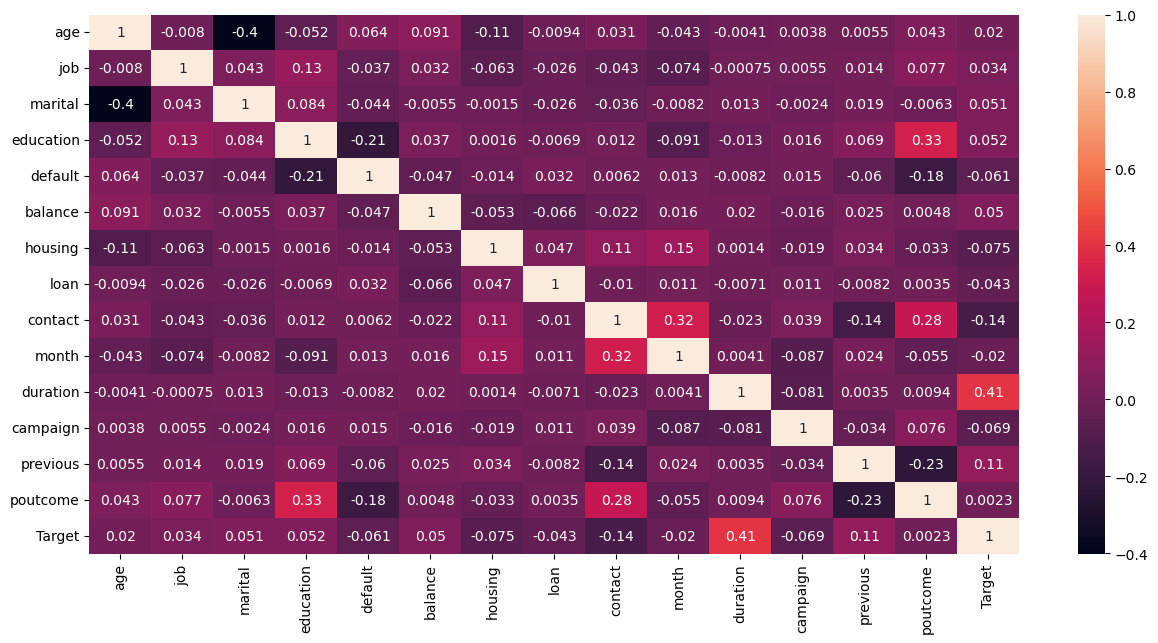

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size= 0.3, random_state= 42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from imblearn.over_sampling import SMOTE


# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling using SMOTE
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [32]:
x_smote

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,39,7,1,8,0,1493.000000,0,0,0,3,912,3,0,4
1,42,4,1,7,0,0.000000,0,0,2,8,234,4,0,4
2,34,1,1,5,0,336.000000,2,0,2,8,713,4,0,4
3,44,0,2,7,0,733.000000,2,0,0,2,360,2,5,3
4,42,1,1,5,0,187.000000,2,0,2,6,43,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67829,31,0,1,7,0,202.458431,0,0,0,10,730,1,3,0
67830,54,9,1,7,0,1626.003631,0,0,0,3,284,1,0,4
67831,28,8,2,2,0,1376.900000,0,0,0,8,224,2,2,3
67832,43,0,1,7,0,10926.388071,0,0,0,0,245,1,1,2


In [33]:
y_smote.value_counts()

1    33917
0    33917
Name: Target, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [52]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
         #  "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=10)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_smote, y_smote)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
best score is: 0.9293701426010175
best parameters are: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


[[13313  1203]
 [  690  1208]]
0.88467162178628
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14516
           1       0.50      0.64      0.56      1898

    accuracy                           0.88     16414
   macro avg       0.73      0.78      0.75     16414
weighted avg       0.90      0.88      0.89     16414



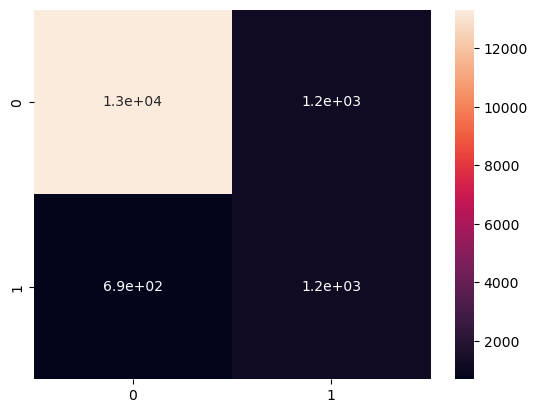

In [53]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

In [43]:
import xgboost as xgb

In [54]:
clf = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=100,
    max_depth=6,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

In [55]:
# Train the classifier on the training data
clf.fit(x_smote, y_smote)

# Make predictions on the test data
y_pred = clf.predict(X_test)


In [56]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     14516
           1       0.39      0.75      0.51      1898

    accuracy                           0.84     16414
   macro avg       0.68      0.80      0.71     16414
weighted avg       0.90      0.84      0.86     16414



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     14516
           1       0.47      0.70      0.56      1898

    accuracy                           0.87     16414
   macro avg       0.71      0.80      0.74     16414
weighted avg       0.90      0.87      0.88     16414

In [57]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12303  2213]
 [  479  1419]]


In [58]:
wanted = test.drop('id',axis=1)

In [59]:
y_pred_test= clf.predict(wanted)

In [60]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =y_pred_test # our model predictions on the test dataset
submission

,id,Target
0,74249,1
1,35779,0
2,66769,0
3,27888,0
4,63306,0
...,...,...
23444,902,0
23445,39745,0
23446,40150,1
23447,6012,1


In [61]:
submission['Target'].value_counts()

0    18330
1     5119
Name: Target, dtype: int64

In [ ]:
0    19423
1     4026

In [62]:
submission.to_csv('v4eman_submission_tune_xgb_tune_1.csv', index=False)